In [1]:
from astropy import constants as cons
from astropy import units as un
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
import sys
plt.rcParams.update({'font.size': 20})

In [2]:
x, y, z, vx, vy, vz, m, d, u = np.genfromtxt('b1/out0882.sph.ascii',usecols= (0,1,2,3,4,5,6,7,8), unpack=True)

In [3]:
Mt = np.sum(m)

In [4]:
xcm = x[np.argmax(d)]
ycm = y[np.argmax(d)]
zcm = z[np.argmax(d)]

In [5]:
vcmx = vx[np.argmax(d)]
vcmy = vy[np.argmax(d)]
vcmz = vz[np.argmax(d)]

In [6]:
new_x = (x-xcm)
new_y = (y-ycm)
new_z = (z-zcm)

new_vx = (vx-vcmx)
new_vy = (vy-vcmy)
new_vz = (vz-vcmz)

In [7]:
r = np.sqrt(new_x**2 + new_y**2 + new_z**2)
v = np.sqrt(new_vx**2 + new_vy**2 + new_vz**2)

In [8]:
index = np.argsort(r)

In [9]:
X = new_x[index]
Y = new_y[index]
Z = new_z[index]

VX = new_vx[index]
VY = new_vy[index]
VZ = new_vz[index]

R = r[index]
V = v[index]

U = u[index]
M = m[index]

In [10]:
Mencl = np.cumsum(M)

In [11]:
G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

In [12]:
E = V**2 + U - G*Mencl/R

/tmp/ipykernel_14738/615990575.py:1: RuntimeWarning: divide by zero encountered in true_divide
  E = V**2 + U - G*Mencl/R


In [13]:
inner_R = np.where(R > 1.5)[0][0]

In [14]:
unb = np.where(E[inner_R:] > 0)[0] + inner_R

In [15]:
bun_fin = np.where(E[inner_R:] <= 0)[0] + inner_R
bun_ini = np.where(R < R[inner_R])[0]
bun = np.concatenate((bun_ini,bun_fin))

In [16]:
Pos_un = np.array([X[unb],Y[unb],Z[unb]])
Vel_un = np.array([VX[unb],VY[unb],VZ[unb]])
P_un = M[unb]*Vel_un

Pos_bn = np.array([X[bun],Y[bun],Z[bun]])
Vel_bn = np.array([VX[bun],VY[bun],VZ[bun]])
P_bn = M[bun]*Vel_bn

In [17]:
L_un = np.cross(Pos_un,P_un, axis = 0)
L_bn = np.cross(Pos_bn,P_bn, axis = 0)

In [18]:
Lt_un = np.array([np.sum(L_un[0]),np.sum(L_un[1]),np.sum(L_un[2])])
Lt_bn = np.array([np.sum(L_bn[0]),np.sum(L_bn[1]),np.sum(L_bn[2])])

In [19]:
print('The L unbound: Lx = '+str(Lt_un[0])+'; Ly = '+str(Lt_un[1])+' and Lz = '+str(Lt_un[2]))
print('The L bound: Lx = '+str(Lt_bn[0])+'; Ly = '+str(Lt_bn[1])+' and Lz = '+str(Lt_bn[2]))

The L unbound: Lx = -29.156632007981777; Ly = 43.828253199207985 and Lz = 153.95468930989813
The L bound: Lx = -16.947538963390244; Ly = 0.339867387213189 and Lz = 166.6192372060267


In [20]:
#I need to rotate the factors twice, respecto to x and respect to y.

In [21]:
if Lt_bn[2] > 0:
    thx = np.arctan(Lt_bn[1]/Lt_bn[2])
    Rx = np.array([[1,0,0],[0,np.cos(thx),-np.sin(thx)],[0,np.sin(thx),np.cos(thx)]])
    thy = -1*np.arctan(Rx.dot(Lt_bn)[0]/Rx.dot(Lt_bn)[2])
    Ry = np.array([[np.cos(thy),0,np.sin(thy)],[0,1,0],[-np.sin(thy),0,np.cos(thy)]])
    print(Ry.dot(Rx.dot(Lt_bn)))
    print(np.linalg.norm(Lt_bn))
    
else:
    thx = np.arctan(Lt_bn[1]/Lt_bn[2])
    Rx = np.array([[1,0,0],[0,np.cos(thx),-np.sin(thx)],[0,np.sin(thx),np.cos(thx)]])
    thy = -1*np.arctan(Rx.dot(Lt_bn)[0]/Rx.dot(Lt_bn)[2]) + np.pi
    Ry = np.array([[np.cos(thy),0,np.sin(thy)],[0,1,0],[-np.sin(thy),0,np.cos(thy)]])
    print(Ry.dot(Rx.dot(Lt_bn)))
    print(np.linalg.norm(Lt_bn))

[  0.           0.         167.47926676]
167.47926675823103


In [22]:
Pos_un_rot = Ry.dot(Rx.dot(Pos_un))
Vel_un_rot = Ry.dot(Rx.dot(Vel_un))
P_un_rot = M[unb]*Vel_un_rot

Pos_bn_rot = Ry.dot(Rx.dot(Pos_bn))
Vel_bn_rot = Ry.dot(Rx.dot(Vel_bn))
P_bn_rot = M[bun]*Vel_bn_rot

In [23]:
L_un_rot = np.cross(Pos_un_rot,P_un_rot, axis = 0)
L_bn_rot = np.cross(Pos_bn_rot,P_bn_rot, axis = 0)

In [24]:
Lt_un_rot = np.array([np.sum(L_un_rot[0]),np.sum(L_un_rot[1]),np.sum(L_un_rot[2])])
Lt_bn_rot = np.array([np.sum(L_bn_rot[0]),np.sum(L_bn_rot[1]),np.sum(L_bn_rot[2])])

In [25]:
print('The rotated L unbound: Lx = '+str(Lt_un_rot[0])+'; Ly = '+str(Lt_un_rot[1])+' and Lz = '+str(Lt_un_rot[2]))
print('The rotated L bound: Lx = '+str(Lt_bn_rot[0])+'; Ly = '+str(Lt_bn_rot[1])+' and Lz = '+str(Lt_bn_rot[2]))

The rotated L unbound: Lx = -13.418993029139598; Ly = 43.51412823927327 and Lz = 156.20346538636704
The rotated L bound: Lx = -3.1086244689504383e-15; Ly = -8.881784197001252e-16 and Lz = 167.47926675823103


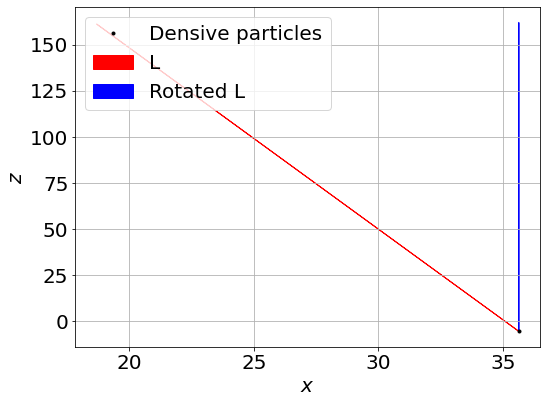

In [26]:
fig = plt.figure(figsize=(8, 6))

plt.plot(x[np.argmax(d)],z[np.argmax(d)],'.k', label = 'Densive particles')

plt.arrow(x[np.argmax(d)],z[np.argmax(d)], Lt_bn[0],Lt_bn[2], color='r', label = 'L')
plt.arrow(x[np.argmax(d)],z[np.argmax(d)], Lt_bn_rot[0],Lt_bn_rot[2], color='b', label = 'Rotated L')

plt.xlabel("$x$")
plt.ylabel("$z$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# I need to rotate the tangential velocities.

In [36]:
R_bn_rot = np.sqrt(Pos_bn_rot[0]**2+Pos_bn_rot[1]**2)
Vrad = (Vel_bn_rot[0]*Pos_bn_rot[0]+Vel_bn_rot[1]*Pos_bn_rot[1])/R_bn_rot
Vtan = (Vel_bn_rot[1]*Pos_bn_rot[0]-Vel_bn_rot[0]*Pos_bn_rot[1])/R_bn_rot
Vz = Vel_bn_rot[2]

/tmp/ipykernel_14738/2462210378.py:2: RuntimeWarning: invalid value encountered in true_divide
  Vrad = (Vel_bn_rot[0]*Pos_bn_rot[0]+Vel_bn_rot[1]*Pos_bn_rot[1])/R_bn_rot
/tmp/ipykernel_14738/2462210378.py:3: RuntimeWarning: invalid value encountered in true_divide
  Vtan = (Vel_bn_rot[1]*Pos_bn_rot[0]-Vel_bn_rot[0]*Pos_bn_rot[1])/R_bn_rot


In [37]:
Vrad = Vrad*(un.R_sun.to(un.km))/(1.8845e-2*86400)
Vtan = Vtan*(un.R_sun.to(un.km))/(1.8845e-2*86400)
Vz = Vz*(un.R_sun.to(un.km))/(1.8845e-2*86400)

In [38]:
np.mean(Vrad[1:])/np.std(Vrad[1:])

0.20654808646052825

In [39]:
np.mean(Vtan[1:])/np.std(Vtan[1:])

0.9888141494728698

In [40]:
np.mean(Vz[1:])/np.std(Vz[1:])

-0.1614366540972241

In [54]:
at = np.histogram(R_bn_rot, bins=100,  weights= Vtan*M[bun])
bt = np.histogram(R_bn_rot, bins=100,  weights= M[bun])
Velt = (at[0]/bt[0])
mean_bint = (at[1][1:] + at[1][:-1]) / 2

/tmp/ipykernel_14738/3409736842.py:3: RuntimeWarning: invalid value encountered in true_divide
  Velt = (at[0]/bt[0])


In [55]:
ar = np.histogram(R_bn_rot, bins=100,  weights= Vrad*M[bun])
br = np.histogram(R_bn_rot, bins=100,  weights= M[bun])
Velr = (ar[0]/br[0])
mean_binr = (ar[1][1:] + ar[1][:-1]) / 2

/tmp/ipykernel_14738/379221808.py:3: RuntimeWarning: invalid value encountered in true_divide
  Velr = (ar[0]/br[0])


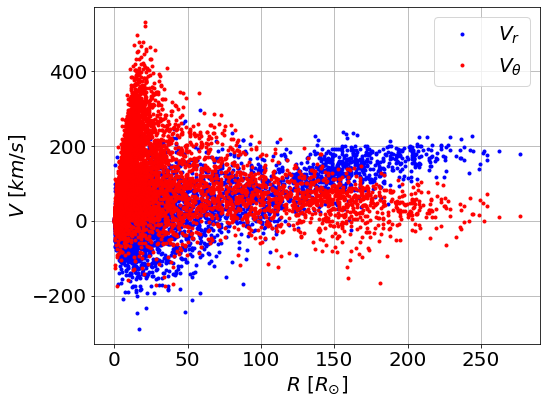

In [56]:
fig = plt.figure(figsize=(8, 6))

plt.plot(R_bn_rot,Vrad,'.b', label = r'$V_{r}$')
plt.plot(R_bn_rot,Vtan,'.r', label = r'$V_{\theta}$')

plt.xlabel("$R$ $[R_{\odot}]$")
plt.ylabel("$V$ $[km/s]$")
#plt.xlim(0,10)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

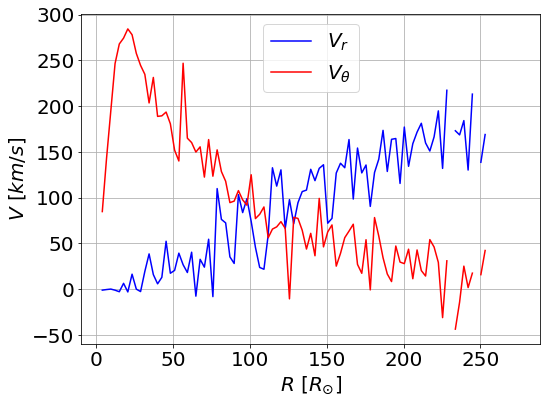

In [57]:
fig = plt.figure(figsize=(8, 6))

plt.plot(mean_binr,Velr,'-b', label = r'$V_{r}$')
plt.plot(mean_bint,Velt,'-r', label = r'$V_{\theta}$')

plt.xlabel("$R$ $[R_{\odot}]$")
plt.ylabel("$V$ $[km/s]$")
#plt.xlim(0,50)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()